# COVerage: Region-Specific SARS-CoV-2 News Query Algorithm 
![Searching GIF](https://media.giphy.com/media/l46Cy1rHbQ92uuLXa/giphy.gif)


In [7]:
# One time run - installs dependencies

import matplotlib.pyplot as plt
from newspaper import fulltext
from nltk.corpus import wordnet
import math
import requests
import numpy as np
import pandas as pd 
from IPython.display import display, HTML
from GoogleNews import GoogleNews
from rank_bm25 import BM25Okapi



In [8]:
def lavaa_extractive(query, url):
    lavaa = 0
    text = (fulltext(requests.get(url).text)).replace("\n", " ")

    query_words = query.split()
    text_words = text.split()
    text_words_len = len(text_words)
    for word in text_words:
        if word in query_words:
            lavaa += 1
    s_query = 10*(lavaa/text_words_len)
    return 1 / (1 + math.exp(-s_query))

def lavaa_abstractive(query, url):
    syn = list()
    query_words = query.split()
    for word in query_words:
        if word != "news":
            for synset in wordnet.synsets(word):
               for lemma in synset.lemmas():
                  syn.append(lemma.name())
            
    lavaa = 0
    try:
        text = (fulltext(requests.get(url).text)).replace("\n", " ")
    except:
        return 0
    text_words = text.split()
    text_words_len = len(text_words)
    for word in text_words:
        if word in query_words or word in syn:
            lavaa += 1
    s_query = 10*(lavaa/text_words_len)

    return 1 / (1 + math.exp(-s_query))

In [11]:
# Google News Query

def query_urls(query):
    urls = []
    googlenews = GoogleNews()
    googlenews.setlang('en')
    googlenews.search(query)
    results = googlenews.result()
    count = 3
    for i in range(count):
        url = results[i]['link']
        try:
            text = (fulltext(requests.get(url).text)).replace("\n", " ")
        except:
            count += 1
        urls.append(url)
    return urls[0], urls[1], urls[2]

query_urls("Global COVID-19 Vaccine")

('https://www.valleynewslive.com/2020/08/02/several-candidates-in-final-stretch-of-global-covid-19-vaccine-race/',
 'https://www.who.int/news-room/detail/15-07-2020-more-than-150-countries-engaged-in-covid-19-vaccine-global-access-facility',
 'https://abcnews.go.com/US/coronavirus-updates-nfl-players-contract-coronavirus-face-team/story?id=72004542')

# Query 3 - International: Vaccine
![Image of globe](https://media.tenor.com/images/de91560eb15766946c8ea4f10cb2b7b4/tenor.gif)

In [18]:
# URL's determined by Google News search algorithm

query1 = "International Coronavirus Vaccine news"
url1_1, url1_2, url1_3 = query_urls(query1)

query2 = "Global COVID-19 Medicine"
url2_1, url2_2, url2_3 = query_urls(query2)

query3 = "International COVID-19 Biology"
url3_1, url3_2, url3_3 = query_urls(query3)

score1_1 = lavaa_abstractive(query1, url1_1)
score1_2 = lavaa_abstractive(query1, url1_2)
score1_3 = lavaa_abstractive(query1, url1_3)
score2_1 = lavaa_abstractive(query2, url2_1)
score2_2 = lavaa_abstractive(query2, url2_2)
score2_3 = lavaa_abstractive(query2, url2_3)
score3_1 = lavaa_abstractive(query3, url3_1)
score3_2 = lavaa_abstractive(query3, url3_2)
score3_3 = lavaa_abstractive(query3, url3_3)

score1_vals = [score1_1, score1_2, score1_3]
score2_vals = [score2_1, score2_2, score2_3]
score3_vals = [score3_1, score3_2, score3_3]

In [15]:
def visualization(queries, score_vals):
    query1 = queries[0]
    query2 = queries[1]
    query3 = queries[2]
    score1_vals = score_vals[0]
    score2_vals = score_vals[1]
    score3_vals = score_vals[2]

    index = np.arange(3)
    width = 0.20
    fig = plt.figure()
    ax = fig.add_subplot(111)

    col1 = ax.bar(index, score1_vals, width, color='b')
    col2 = ax.bar(index+width, score2_vals, width, color='cornflowerblue')
    col3 = ax.bar(index+width*2, score3_vals, width, color='lightsteelblue')

    ax.set_ylabel('COVerage Local Query Metric (LQM)')
    ax.set_xlabel('Queries')
    ax.set_xticks(index+width)
    ax.set_ylim(0.0, 1.0)
    ax.set_xticklabels((query1, query2, query3), rotation=15)
    ax.legend((col1[0], col2[0], col3[0]), ('First result of Google News search', 'Second result of Google News search', 'Third result of Google News search'))
    plt.show()

    score1_av = sum(score1_vals) / len(score1_vals)
    score2_av = sum(score2_vals) / len(score2_vals)
    score3_av = sum(score3_vals) / len(score3_vals)
    scores_av = [score1_av, score2_av, score3_av]

    # Calling DataFrame constructor after zipping 
    # both lists, with columns specified 
    df = pd.DataFrame(list(zip([query1, query2, query3], scores_av)), 
                   columns =['Query', 'Average LQM']) 
    display(df)


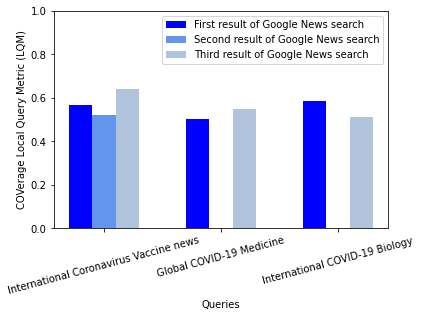

,Query,Average LQM
0,International Coronavirus Vaccine news,0.549170
1,Global COVID-19 Medicine,0.173148
2,International COVID-19 Biology,0.565557


In [19]:
visualization([query1, query2, query3], [score1_vals, score2_vals, score3_vals])

# Query 4 - Los Angeles County, California: Biology
![Clark County Image](https://upload.wikimedia.org/wikipedia/commons/3/32/20190616154621%21Echo_Park_Lake_with_Downtown_Los_Angeles_Skyline.jpg)

In [20]:
query1 = "Los Angeles, California COVID-19 Vaccine"
url1_1, url1_2, url1_3 = query_urls(query1)

query2 = "Los Angeles, California Coronavirus Biology"
url2_1, url2_2, url2_3 = query_urls(query2)

query3 = "Los Angeles, CA Coronavirus Medicine"
url3_1, url3_2, url3_3 = query_urls(query3)

score1_1 = lavaa_abstractive(query1, url1_1)
score1_2 = lavaa_abstractive(query1, url1_2)
score1_3 = lavaa_abstractive(query1, url1_3)
score2_1 = lavaa_abstractive(query2, url2_1)
score2_2 = lavaa_abstractive(query2, url2_2)
score2_3 = lavaa_abstractive(query2, url2_3)
score3_1 = lavaa_abstractive(query3, url3_1)
score3_2 = lavaa_abstractive(query3, url3_2)
score3_3 = lavaa_abstractive(query3, url3_3)

score1_vals = [score1_1, score1_2, score1_3]
score2_vals = [score2_1, score2_2, score2_3]
score3_vals = [score3_1, score3_2, score3_3]

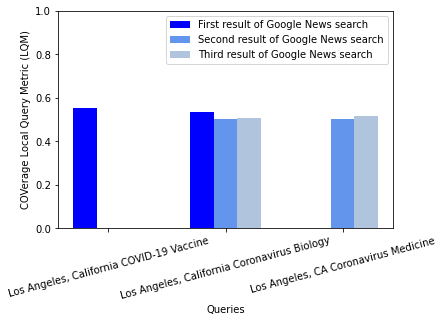

,Query,Average LQM
0,"Los Angeles, California COVID-19 Vaccine",0.362163
1,"Los Angeles, California Coronavirus Biology",0.334651
2,"Los Angeles, CA Coronavirus Medicine",0.340832


In [21]:
visualization([query1, query2, query3], [score1_vals, score2_vals, score3_vals])

# Conclusions
As shown by the data, queries about vaccine progress are more of a global effort and do not fit the localized theme of this project. Vaccine/Medicine effort is more of an internationally researched topic and is better answered by displaying international news